### **Creating** **own** **Dataset**

*Here I will use Fast.ai library to create the Facial Classification model. So, I will initiate the Fast.ai environment first.*

In [1]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


*I'm using Colab for this Project. So, I am accessing My drive.*

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# root_dir = "drive/My Drive/"
# base_dir = root_dir + 'fastai-v3/'

### **Initialization of Dependencies.**

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
from fastai.vision import *
from fastai.metrics import *

*Here, I have used Asterix to import all necessary libraries and utilities which might be quite intimidating but it is easy and fast practice to import all necessary libraries and utilities at once.*

**Getting URLs, Creating Directory and Initializing Server.**

In [6]:
folder = 'Happy Face'
base_dir = root_dir + 'fastai-v3/'
file = 'happy.txt'

In [7]:
folder = 'Sad Face'
base_dir = root_dir + 'fastai-v3/'
file = 'sad.txt'

In [8]:
folder = 'Surprising Face'
base_dir = root_dir + 'fastai-v3/'
file = 'surprise.txt'

In [9]:
folder = 'Angry Face'
base_dir = root_dir + 'fastai-v3/'
file = 'angry.txt'

In [10]:
folder = 'Laughing Face'
base_dir = root_dir + 'fastai-v3/'
file = 'laugh.txt'

*This cell should be run once per each category.*

In [11]:
path = Path(base_dir + 'data/faces/Laughing Face')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
path.ls()

[PosixPath('drive/My Drive/fastai-v3/data/faces/Laughing Face/Laughing Face'),
 PosixPath('drive/My Drive/fastai-v3/data/faces/Laughing Face/laugh.txt'),
 PosixPath('drive/My Drive/fastai-v3/data/faces/Laughing Face/Happy Face'),
 PosixPath('drive/My Drive/fastai-v3/data/faces/Laughing Face/Sad Face'),
 PosixPath('drive/My Drive/fastai-v3/data/faces/Laughing Face/Surprising Face'),
 PosixPath('drive/My Drive/fastai-v3/data/faces/Laughing Face/Angry Face')]

### **Download Images**

In [13]:
download_images(path/file, dest, max_pics=300)

In [14]:
classes = ["Happy Face", "Sad Face", "Surprising Face", "Angry Face", "Laughing Face"]

*Let's remove the images that cannot be opened.*

In [15]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

Happy Face
Sad Face
Surprising Face
Angry Face
Laughing Face


### **Looking the Data**

In [16]:
path = Path(base_dir + 'data/faces')

In [17]:
# doc(ImageDataBunch.from_folder)

In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['Angry Face', 'Happy Face', 'Laughing Face', 'Sad Face', 'Surprising Face']

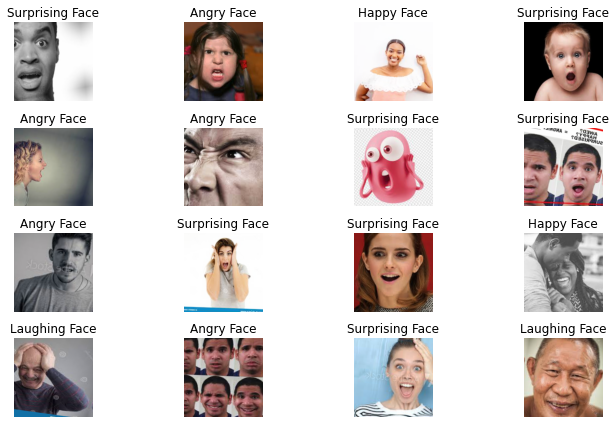

In [20]:
data.show_batch(rows=4, figsize=(10, 6))

In [21]:
data.c, len(data.train_ds), len(data.valid_ds)

(5, 448, 112)

### **Training the Model**

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.703612,2.298734,0.741071,02:18
1,2.259760,1.914666,0.616071,00:08
2,1.909329,1.872252,0.553571,00:08
3,1.686829,1.871662,0.571429,00:08


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [24]:
learn.save('stage-1')

In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


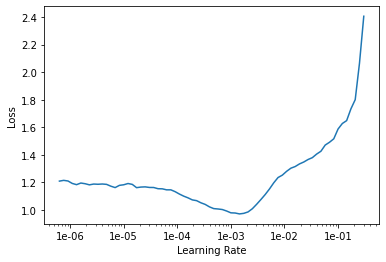

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(2, max_lr=slice(1e-05, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,1.193799,1.854258,0.562500,00:09
1,1.056358,2.039985,0.571429,00:09


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [29]:
learn.save('stage-2')

### **Interpretation**

In [30]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (448 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Happy Face,Happy Face,Happy Face,Happy Face,Happy Face
Path: drive/My Drive/fastai-v3/data/faces;

Valid: LabelList (112 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Angry Face,Angry Face,Surprising Face,Sad Face,Angry Face
Path: drive/My Drive/fastai-v3/data/faces;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddin

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

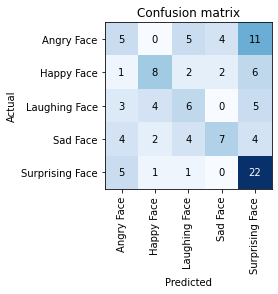

In [32]:
interp.plot_confusion_matrix()

In [33]:
# from fastai.widgets import *

In [34]:
# doc(ImageCleaner)

### **Putting Model into Production**

In [35]:
learn.export()

*Let's use CPU for this instance.*

In [36]:
defaults.device = torch.device('cpu')

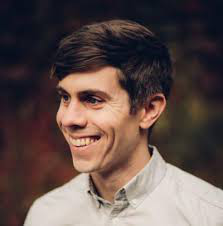

In [43]:
img = open_image(path/'Happy Face'/'happy.jpg')
img

*Let's check learner into production.*

In [44]:
learn = load_learner(path)

In [45]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class.obj

'Laughing Face'

In [47]:
learn.save('model')